#### Part II. Model Comparison with Random Forests

##### In Part II, you will conduct a machine learning experiment to compare the performance of Random Forests under varying hyper-parameter values.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve


0. To start, download the provide adult.data. This census dataset originates from a Machine Learning
Repository. For a detailed description of the data, refer to https://archive.ics.uci.edu/dataset/2/adult. The
dataset has a class feature, INCOME, with two categorical values: ‘<= 50K’ and ‘> 50K’. The task
involves classifying whether income exceeds $50K/yr.


1. Data Exploration:

1. (a) Load the given dataset:

In [2]:
data = pd.read_csv("adult.data") #1 a.
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "martial-status", "occupation", "relationship", "race", "sex", "capital-gain","capital-loss", "hours-per-week","native-country","income"]

1. (b) Exhibit the initial few rows of the dataset. Show the count of instances and descriptive features in
the original data. 

In [3]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.describe() #this shows count of instances and descriptive features

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
num_instances, num_features = data.shape
print("Total instances: "+str(num_instances))
print("Total features: "+str(num_features))

Total instances: 32560
Total features: 15


1. (c) The Adult dataset represents missing values with ‘?’. Show the count of missing values per each
feature.


In [6]:
missing_values = data.apply(lambda x: x.value_counts().get('?', 0))
print(missing_values)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
martial-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


1. (d) Eliminate instances containing missing values. Subsequently, display the updated instance count.

In [7]:
print("Size of data before dropping '?' values: "+str(len(data)))
data = data.dropna()
print("Size of data after dropping '?' values: "+str(len(data)))

Size of data before dropping '?' values: 32560
Size of data after dropping '?' values: 32560


1. (e) Illustrate a histogram representing instance counts per INCOME class

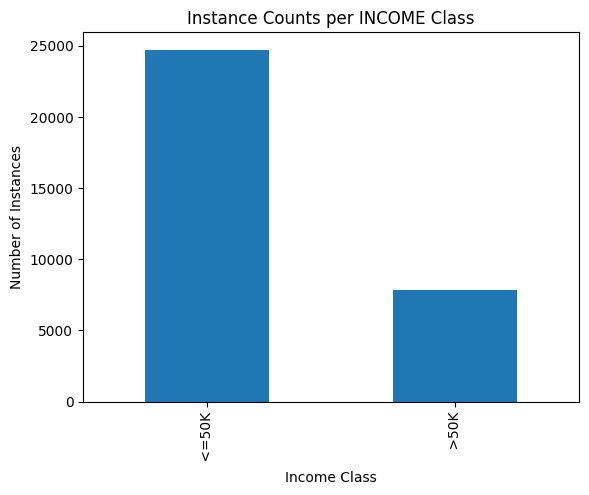

In [8]:
income_counts = data['income'].value_counts()
income_counts.plot(kind='bar')
plt.title('Instance Counts per INCOME Class')
plt.xlabel('Income Class')
plt.ylabel('Number of Instances')
plt.show()


2. Data Preparation

2. (f) The class feature, INCOME, comprises two categorical values: ‘<=50K’ and ‘>50K’. Transform
this feature into binary 0/1

In [9]:
print(data["income"].unique())
def get_label(label):
    if label == " >50K":
        return 1
    else:
        return 0
    
data["income"] = data["income"].apply(get_label)


[' <=50K' ' >50K']


2. (g) Implement One-hot Encoding for the categorical variables

In [10]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['workclass', 'education', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoded_values = encoder.fit_transform(data[categorical_cols])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(categorical_cols, axis=1)
data = pd.concat([data, encoded_df], axis=1)


2. (h) Present the first few rows of the processed data. How many descriptive features does the data now
include?

In [11]:
data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,50,83311,13,0,0,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,215646,9,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,53,234721,7,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28,338409,13,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37,284582,14,0,0,40,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Columns: 101 entries, age to native-country_ Yugoslavia
dtypes: float64(94), int64(7)
memory usage: 25.1 MB


We have a total of 100 features.

In [13]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817,0.029484,0.064281,0.000215,...,0.001136,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895854,0.002058,0.000491
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586,0.169161,0.245257,0.014661,...,0.033691,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.305455,0.045316,0.022162
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have a total of 100 continous/descriptive features.

2. (i) Allocate 70% of the data for training, and the remaining 30% for testing. While splitting the data, ensure that the distribution of classes in the target feature is consistent in both the training and test sets using stratified  sampling.

In [14]:
y = data["income"]
X = data.drop(columns=["income"])
# we just will use stratify parameter to ensure stratified sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

3. Random Forests and Performance Evaluation:

3. (j) Construct four Random Forests models, each varying by the number of trees in the forest (the hyper-parameter m), each 5, 10, 50 and 500.

In [15]:
rf_five = RandomForestClassifier(n_estimators=5, random_state=42)
rf_ten = RandomForestClassifier(n_estimators=10, random_state=42)
rf_fifty = RandomForestClassifier(n_estimators=50, random_state=42)
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf_five = rf_five.fit(X_train, y_train)
rf_ten = rf_ten.fit(X_train, y_train)
rf_fifty = rf_fifty.fit(X_train, y_train)
rf_hundred = rf_hundred.fit(X_train, y_train)
y_prob_five = rf_five.predict_proba(X_test)[:,1]
y_prob_ten = rf_ten.predict_proba(X_test)[:,1]
y_prob_fifty = rf_fifty.predict_proba(X_test)[:,1]
y_prob_hundred = rf_hundred.predict_proba(X_test)[:,1]

3. (k) Generate and plot the ROC curves of each model collectively. 

In [17]:
fpr_five, tpr_five, _ = roc_curve(y_test, y_prob_five)
fpr_ten, tpr_ten, _ = roc_curve(y_test, y_prob_ten)
fpr_fifty, tpr_fifty, _ = roc_curve(y_test, y_prob_fifty)
fpr_hundred, tpr_hundred, _ = roc_curve(y_test, y_prob_hundred)


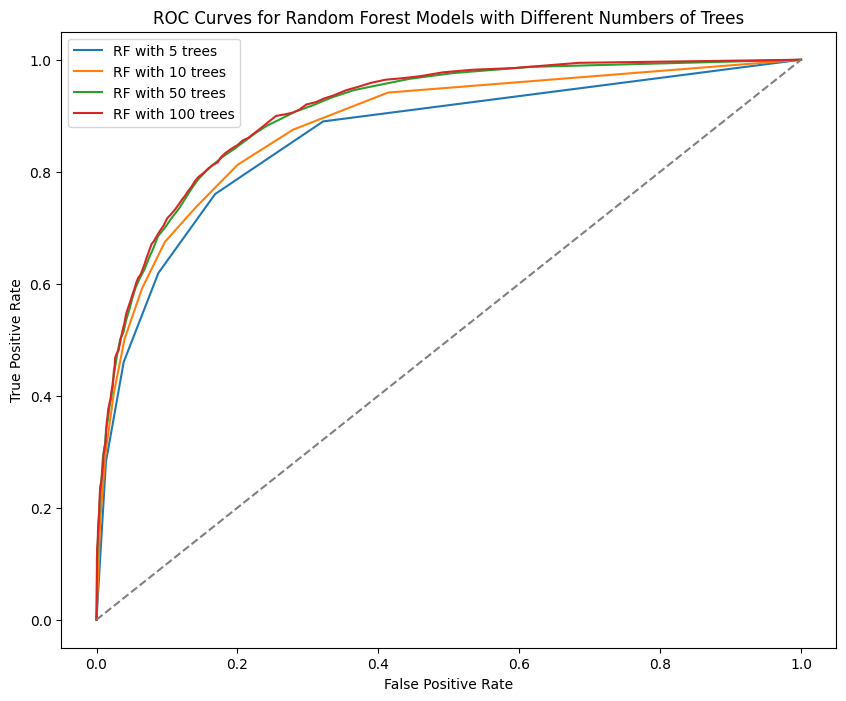

In [18]:

plt.figure(figsize=(10, 8))
plt.plot(fpr_five, tpr_five, label="RF with 5 trees")
plt.plot(fpr_ten, tpr_ten, label="RF with 10 trees")
plt.plot(fpr_fifty, tpr_fifty, label="RF with 50 trees")
plt.plot(fpr_hundred, tpr_hundred, label="RF with 100 trees")

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Random Forest Models with Different Numbers of Trees")
plt.legend()
plt.show()

3. (l) Explain which random forests classifier(s) exhibit(s) superior performance
Answer:
- The random forest with 100 trees performs the best out of the four, however, the performance of random forest with 50 trees closely follows this. 
-   One reason could be that random forest with 5 and 10 trees can be too simple to capture or generalize patterns within the data.